In [1]:
import facenet_mini as fm

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [3]:
path = "./notebooks/images/train/"
n_faces = 100

vector_length = 32
multiplication_factor = 64

margin = 16
epochs = 250

In [4]:
dataset = fm.Dataset(path=path,n_faces=n_faces)

In [5]:
dataset.parse()

100%|██████████| 300/300 [00:00<00:00, 366.55it/s]


Dataset Parser @ /storage/facenet_mini/notebooks/images/train

In [6]:
model = fm.base_network(vector_length=vector_length,multiplication_factor=multiplication_factor)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 110, 110, 3) 0                                            
__________________________________________________________________________________________________
conv_0_a (Conv2D)               (None, 110, 110, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv_1_a (Conv2D)               (None, 110, 110, 32) 9248        conv_0_a[0][0]                   
__________________________________________________________________________________________________
conv_2_a (Conv2D)               (None, 110, 110, 32) 9248        conv_1_a[0][0]                   
______________________________________________________________________________________________

In [8]:
train = fm.net.builder(model=model)

In [9]:
train.summary()

Model: "triplet_trainig"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anc (InputLayer)                [(None, 110, 110, 3) 0                                            
__________________________________________________________________________________________________
pos (InputLayer)                [(None, 110, 110, 3) 0                                            
__________________________________________________________________________________________________
neg (InputLayer)                [(None, 110, 110, 3) 0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 32)           3377984     anc[0][0]                        
                                                                 pos[0][0]          

In [10]:
pairs = fm.Pairs(model,dataset.x,dataset.y,)

In [11]:
loss = fm.Triplet(margin=margin,vector_length=vector_length)

In [12]:
opt = fm.net.Adagrad(0.0001)

In [13]:
eh = fm.net.StopTraining()

In [14]:
f = pairs.flow(epochs=epochs)

In [15]:
train.compile(optimizer=opt,loss=loss)

In [ ]:
train.fit_generator(f,epochs=epochs,steps_per_epoch=len(dataset.x),callbacks=[eh])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
300/300 [==============================] - 7s 22ms/step - loss: 4148.2485
Epoch 2/250
300/300 [==============================] - 7s 22ms/step - loss: 961.9244
Epoch 3/250
300/300 [==============================] - 7s 23ms/step - loss: 533.5890
Epoch 4/250
300/300 [==============================] - 7s 22ms/step - loss: 264.6157
Epoch 5/250
300/300 [==============================] - 7s 22ms/step - loss: 102.5069
Epoch 6/250
300/300 [==============================] - 7s 22ms/step - loss: 103.9467
Epoch 7/250
300/300 [==============================] - 7s 22ms/step - loss: 118.6768
Epoch 8/250
300/300 [==============================] - 7s 22ms/step - loss: 116.7358
Epoch 9/250
300/300 [==============================] - 7s 22ms/step - loss: 79.7865
Epoch 10/250
300/300 [==============================] - 7s 22ms/step - loss: 62.6871
Epoch 11/250
300/300 [==============================] - 7s 22ms/step - los

In [ ]:
tsne = TSNE(2,)

In [ ]:
emb = model.predict(dataset.x,batch_size=32)

In [46]:
enc = tsne.fit_transform(emb,)

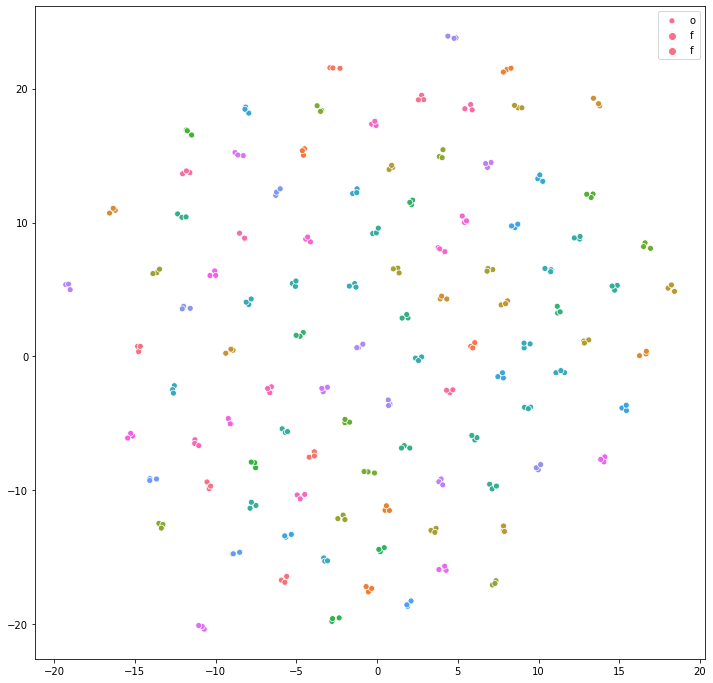

In [49]:
plt.figure(figsize=(12,12))
sns.scatterplot(enc[:,0],enc[:,1],hue=dataset.y)

plt.legend("off")